In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\GreatLearning\Datasets\turkiye-student-evaluation_generic.csv")

In [3]:
data.shape

(5820, 33)

In [4]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

In [6]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


The average number of times a student had to repeat: 1.21 ~ 1. 
Also the minimum number of times a students had to repeat: 1.
This means that the college's course content or instructor's teaching is not up to the mark. Students are have to repeat the course again, which means teaching style has to be improved.

The average attendance code for the students was also dismal, almost 2.

From Q1 - Q28, the average rating hovers between 2.7 - 3.3, which means that the overall performance of the university was strictly above average.


But the data is unlabeled, so we will do a more detailed analysis through clustering, to see how other people voted.

In [7]:
data.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

For figuring out significant varibles, and the nature of the features, we look at the type of varibles in the dataset.

In [8]:
features=[]
nof=[]
for i in data.columns:
    features.append(i)
    nof.append(data[i].nunique())
    
    
table = pd.DataFrame( {'Feature':features,
                       'Number of Features':nof
                      })

In [9]:
table

,Feature,Number of Features
0,instr,3
1,class,13
2,nb.repeat,3
3,attendance,5
4,difficulty,5
5,Q1,5
6,Q2,5
7,Q3,5
8,Q4,5
9,Q5,5


The instructor code and the course code will be inferred as categorical variables.
While the remaining features will be inferred as discrete numerical data.

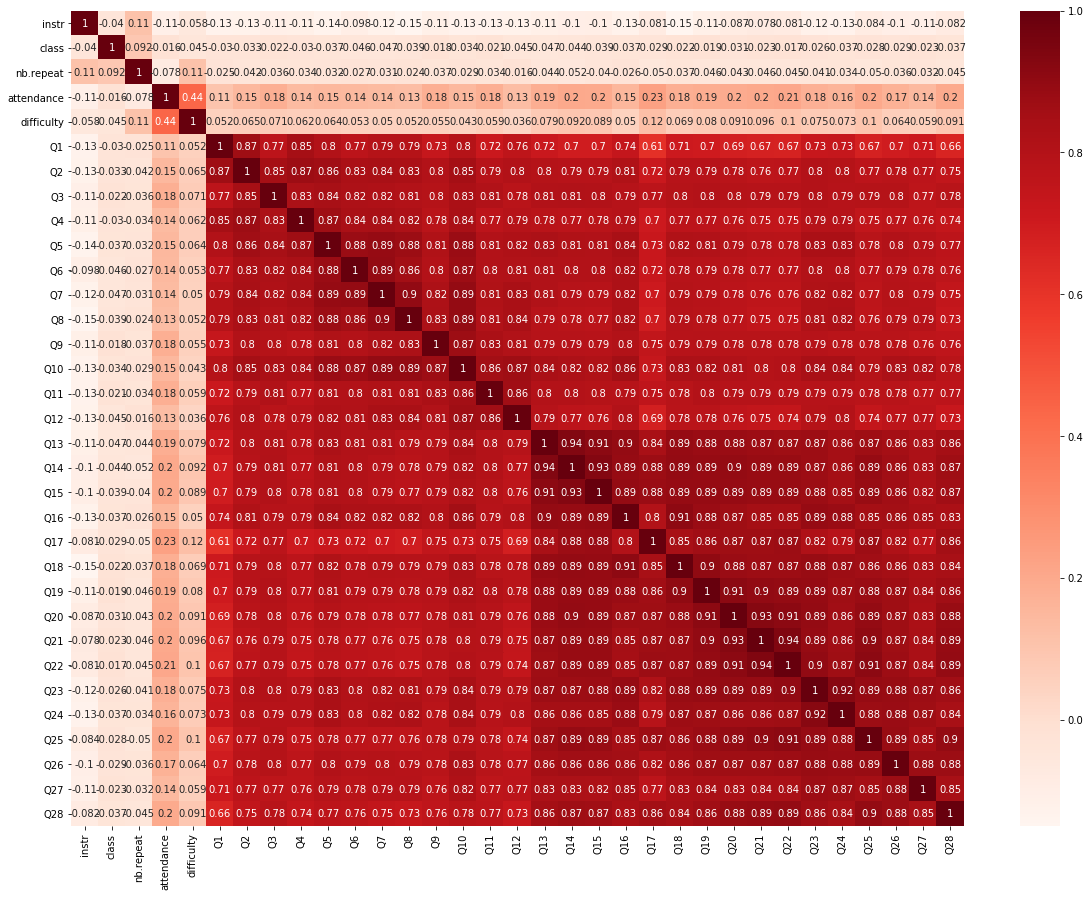

In [10]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Since there is a strong presence of multicollinearity, we will be applying PCA to reduce multicollinearity.
If multicollinearity has a strong presence in the dataset then the algorithm wont be able to differentiate between the datset points as clearly.
A features' indivudual impact is extracted when we apply PCA. We want the algorithm to see the differences and no the similarities between two higly correlated features.

In [11]:
kdata = data.copy()

In [12]:
kdata.drop(['instr','class'],axis=1,inplace=True)

Instr and Class will be dropped because they are category codes and not evaluations.

Now we scale our data so that the algorithm does become biased towards any numerical feature with huge numbmers.

In [13]:
from scipy.stats import zscore

In [14]:
kscaled = kdata.apply(zscore)

In [15]:
kscaled.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [16]:
>>> import numpy as np
>>> from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcascaled=pca.fit_transform(kscaled)

K means clustering by fitting the data and checking the cluster errors for multiple number of clusters.

In [17]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters,n_init = 9, random_state=2)
    clusters.fit(pcascaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,143035.703147
1,2,56254.546375
2,3,25226.431954
3,4,16821.426995
4,5,11733.774661
5,6,9635.474389
6,7,8324.124802
7,8,7512.016157
8,9,6623.903207
9,10,5868.377387


The number of optimal clusters can be decided by the magnitude of difference in between two cluster erros.

To make the job easier we draw an elbow plot to decide with the optimal number of clusters.

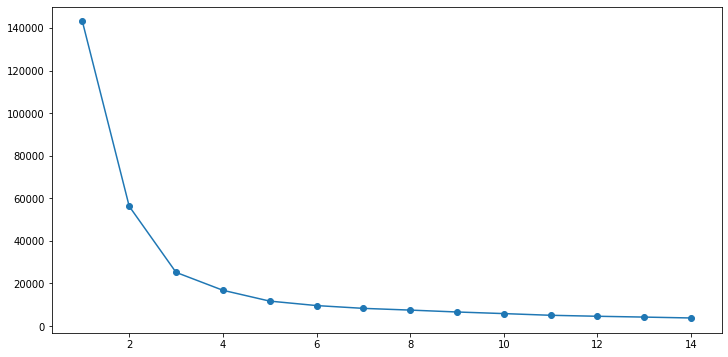

In [18]:
#Elbow Plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In the plot above, the length of the blue line indicates the reduction in error with an increase the number of cluster.

So, at no_of_clusters = 3, the error reduction is the lowest before the error dfference becomes almost uniform between other clusters starting from cluster = 4

In [19]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [20]:
kmeans.fit(pcascaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [21]:
kmeans.inertia_

25226.43195429107

In [22]:
pcascaled[:,0]

array([ 0.80950412,  0.79470258, -7.52250487, ..., -7.46642711,
        9.08387115,  9.08387115])

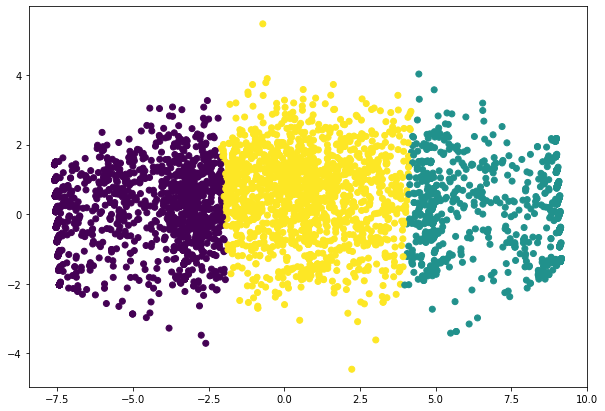

In [23]:
plt.figure(figsize=(10, 7))  
plt.scatter(pcascaled[:,0], pcascaled[:,1], c=kmeans.labels_,cmap='viridis')

Now we check the aggolomerative model - The aggolomerative model comes in handy to check how intact a cluster is from another based, on its dissimilrities and how intact it is within itself.

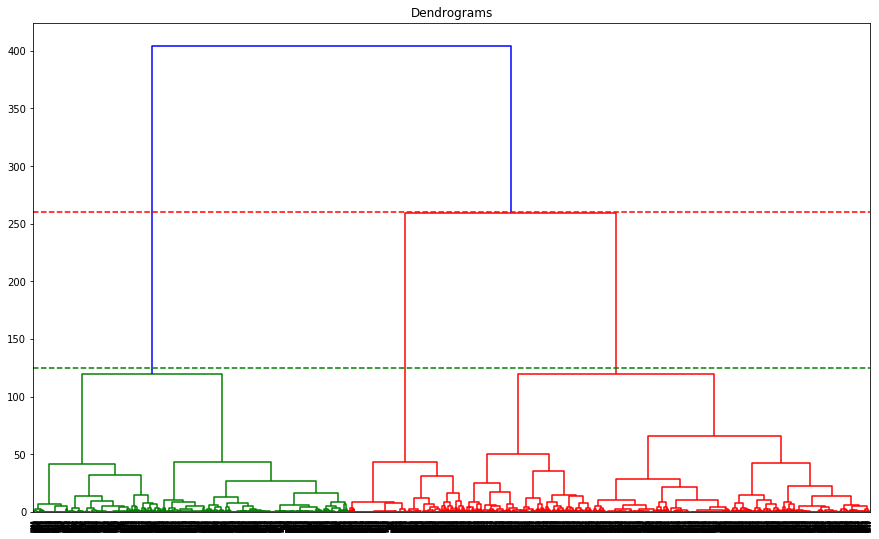

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(15, 9))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(pcascaled, method='ward'))
plt.axhline(y=125, color='g', linestyle='--')
plt.axhline(y=260,color='r', linestyle='--')

So from here to we can see that we have either 2 clusters or 3 clusters.

Observations: The height distance between the green cluster and red cluster can help us decide on the number of clusters.

Distance of top blue line to top red line = 406- 260 = 146
Distance from top red line to the biggest red cluster on the right = 260 - 120 = 140
Distance from top red line to the biggest red cluster on the left = 260 - 48 = 212

so since the distance from the top red line to the biggest red cluster on the left is greater than the top blue to the top red line, then the red left cluster is an individual cluster in its self.
Another way of saying can be that the left red cluster share more considerable dissimilarities than similarities. Hence we can say that
186 > 162.

1st cluster: green cluster
2nd cluster: left red cluster
3rd cluster: right red cluster.

This that we have almost 3 intact clusters.

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(pcascaled)

array([1, 1, 0, ..., 0, 2, 2], dtype=int64)

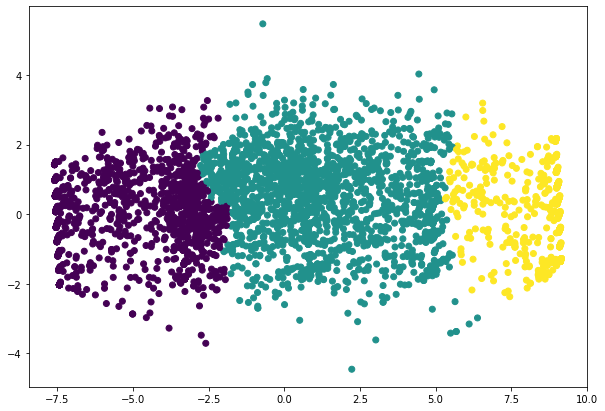

In [26]:
plt.figure(figsize=(10, 7))  
plt.scatter(pcascaled[:,0],pcascaled[:,1], c=cluster.labels_,cmap='viridis')

So Aggolomerative and K-Means Clustering clusters have almost the same cluster boundaries for 3 clusters. Thus, we go ahead with the 3 clusters calculated through K-Means

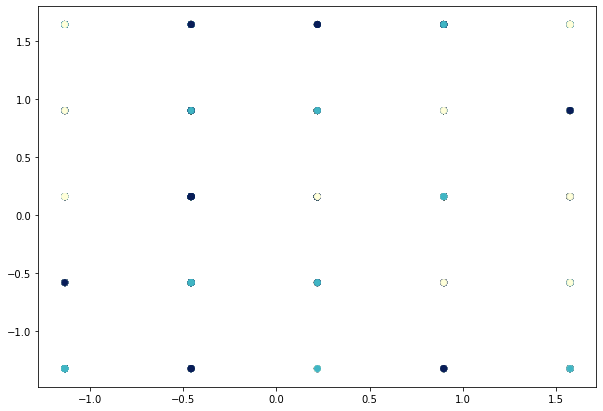

In [27]:
plt.figure(figsize=(10, 7))  
plt.scatter(kscaled['attendance'], kscaled['difficulty'], c=kmeans.labels_,cmap='YlGnBu')

We also check our optimal number of clusters through silhoutte analysis. 

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5045371825036298


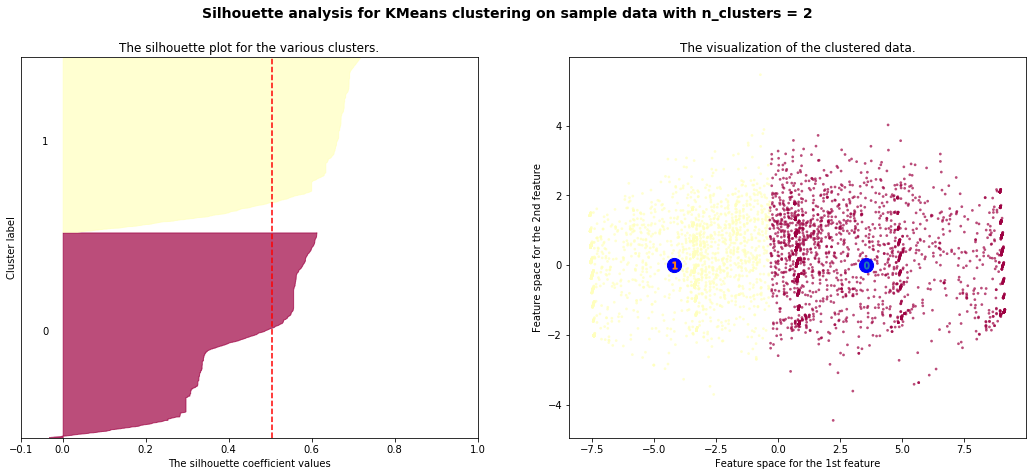

For n_clusters = 3 The average silhouette_score is : 0.5307186402446941


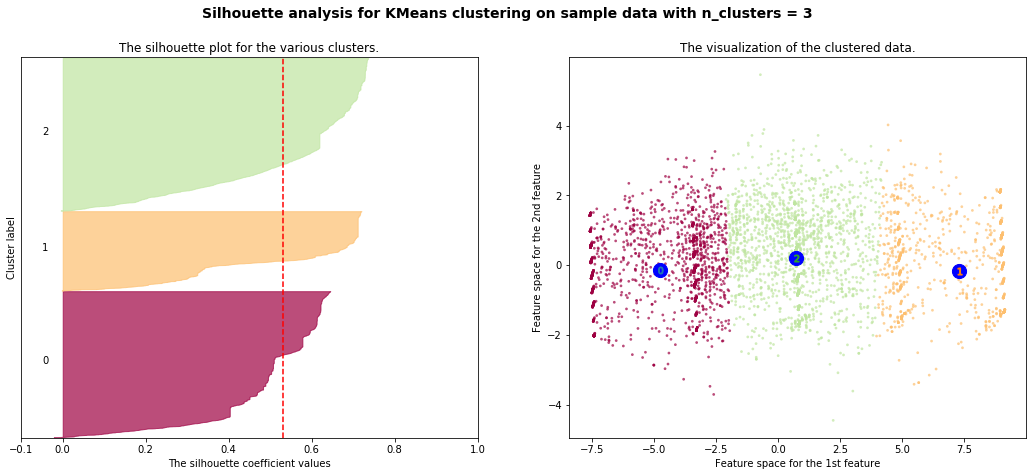

For n_clusters = 4 The average silhouette_score is : 0.5312099421899034


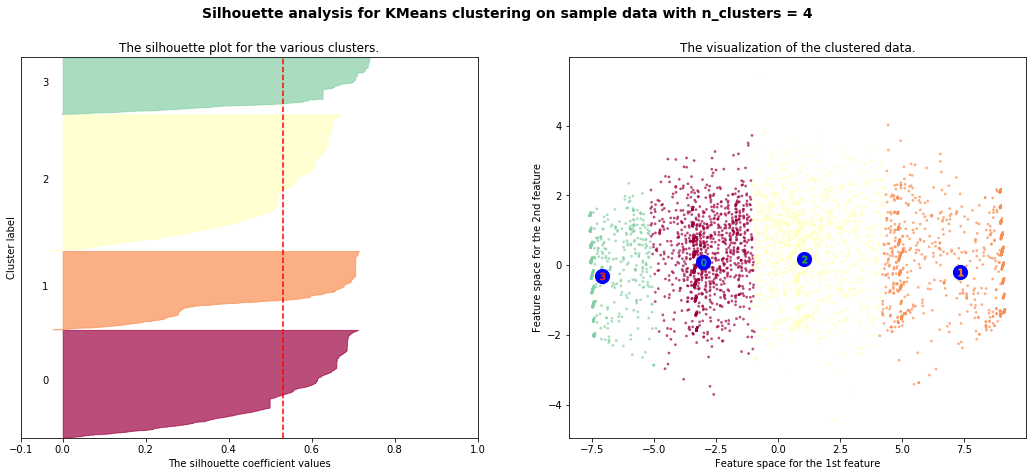

For n_clusters = 5 The average silhouette_score is : 0.5431805601872863


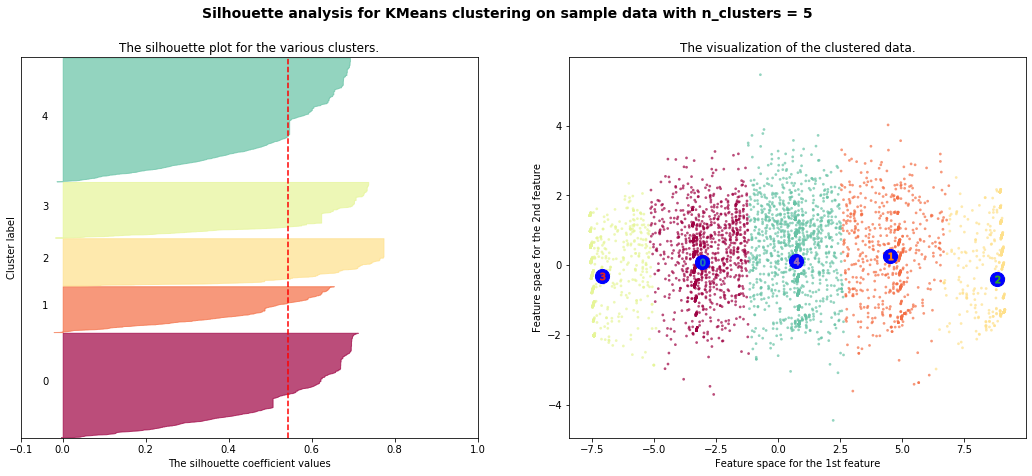

For n_clusters = 6 The average silhouette_score is : 0.5084726289515952


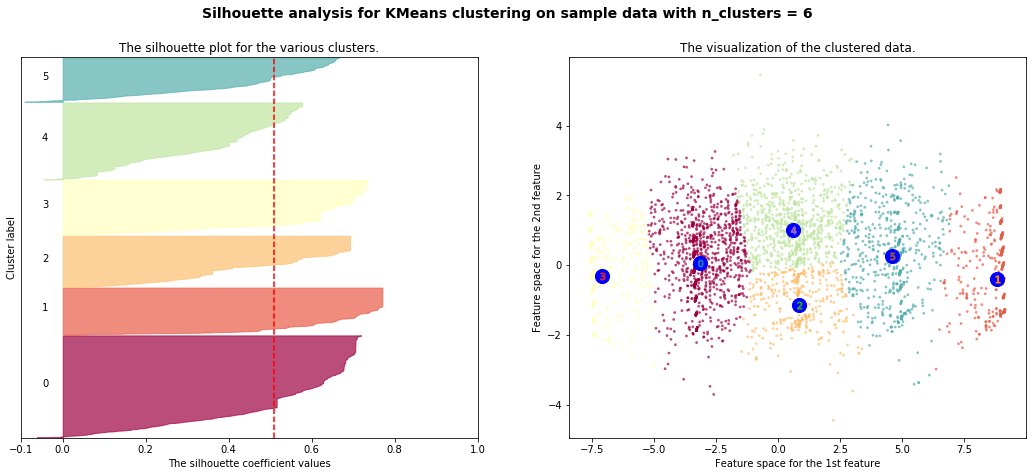

For n_clusters = 7 The average silhouette_score is : 0.4654665579527547


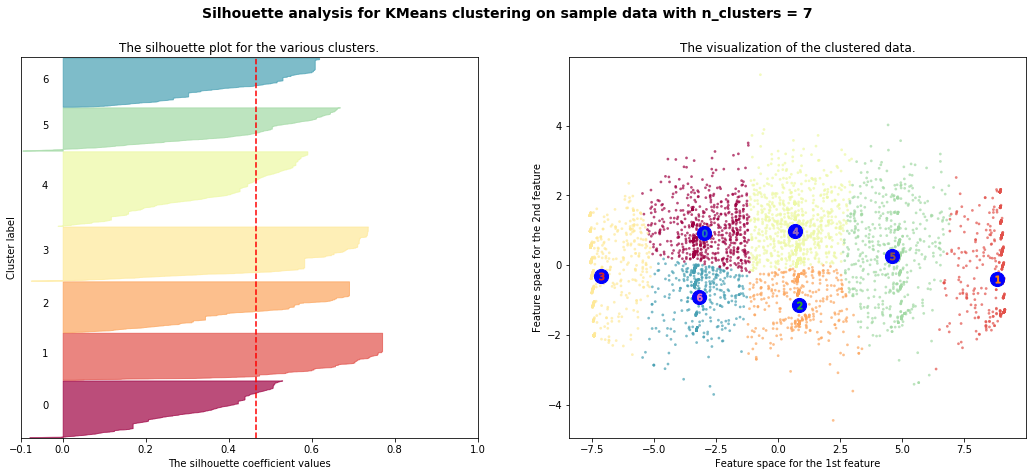

For n_clusters = 8 The average silhouette_score is : 0.46449295173928223


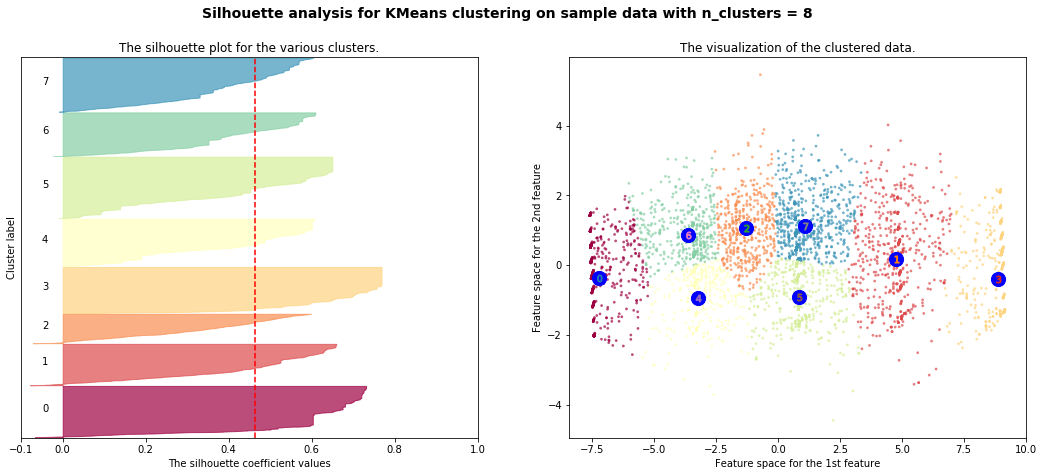

In [28]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=pcascaled

range_n_clusters = [2, 3, 4, 5,6,7,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="blue", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Here the silhoutte score for cluster size n = 2 is greater than the score for n=3. So it seems that cluster size n=2 will be more accurate than n=3. But since the difference between the two scores in not huge, so we go ahead 3 clusters.

But through Elbow plot and Dendrogram, the most optimal number of clusters should be 3.

Going ahead with the k means clustering: To check how varying are each cluster from each other.

In [29]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [30]:
pcascaled.shape

(5820, 2)

In [31]:
kscaled.shape

(5820, 31)

In [32]:
kmeans.fit(pcascaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [33]:
centroids=kmeans.cluster_centers_

In [34]:
centroids

array([[-4.75087536, -0.13241813],
       [ 7.32175715, -0.17901952],
       [ 0.74436864,  0.22021093]])

In [35]:
centroid_df = pd.DataFrame(centroids, columns = list(pcascaled) )

In [36]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [37]:
# Joining the label dataframe with the STUDENT EVALUATION DATAFRAME  to create stud_df_labeled.
stud_df_labeled = kdata.join(df_labels)

In [38]:
stud_df_labeled = stud_df_labeled.join(data['instr'])#,'class'

In [39]:
stud_df_labeled = stud_df_labeled.join(data['class'])#,'class'

In [40]:
stud_clusters = stud_df_labeled.groupby(['labels'])
df0=stud_clusters.get_group(0)
df1=stud_clusters.get_group(1)
df2=stud_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q22,Q23,Q24,Q25,Q26,Q27,Q28,labels,instr,class
2,1,2,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,1,2
5,1,3,3,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0,1,2
6,1,1,3,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0,1,2
7,1,1,3,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,0,1,2
8,1,1,3,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0,1,2


Now by plotting multiple boxplots on the basis of our k-means calculated labels, we can see how the evaluations by students differs by each label.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDC12B7F28>,
      dtype=object)

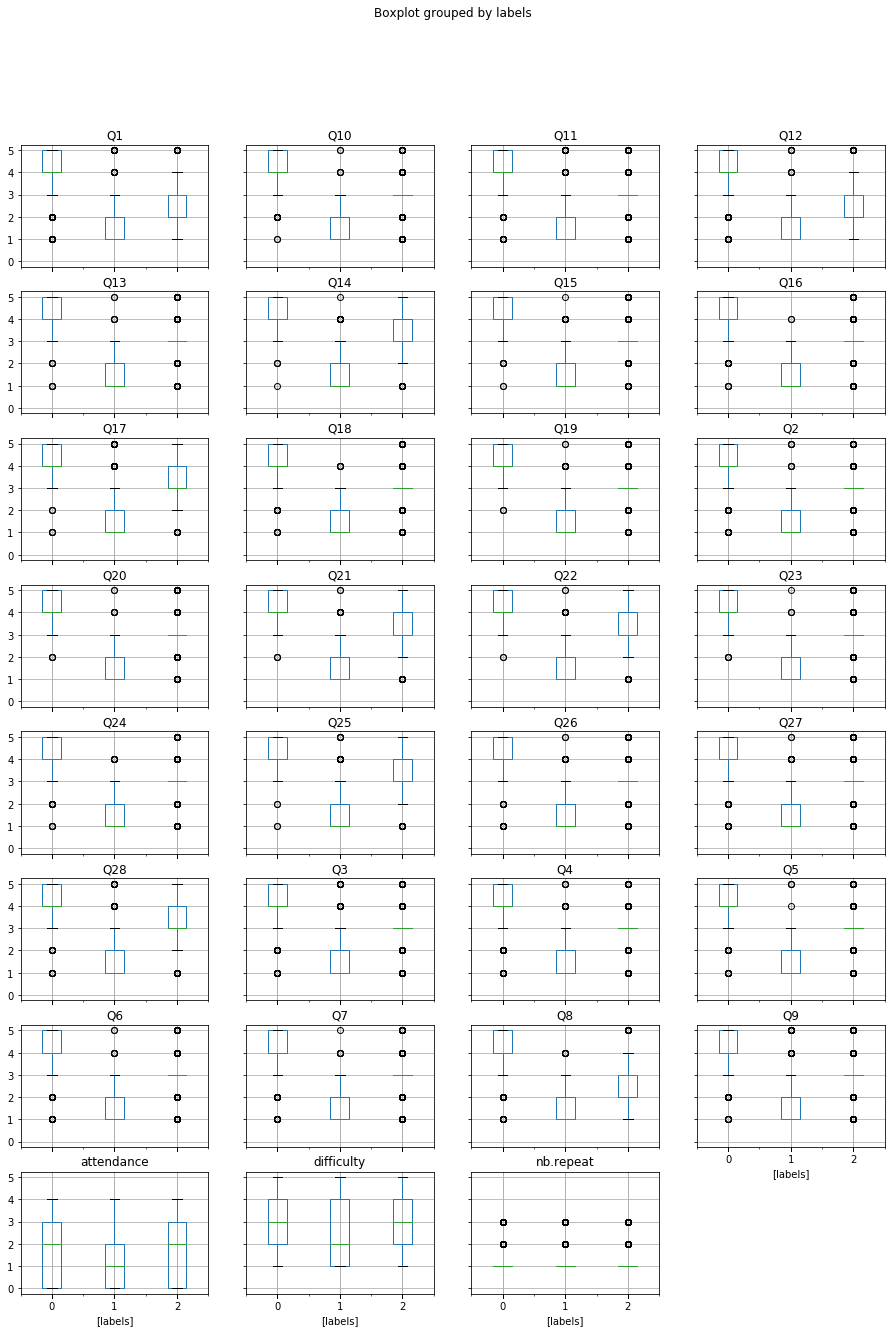

In [41]:
finaldf.drop(['instr','class'],axis=1).boxplot(by = 'labels',layout=(9,4),   figsize=(15, 24))

In [ ]:
We have our labels and to see more precise descriptive statistics varying by each label.

In [42]:
finaldf[finaldf['labels']==0].describe()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr,class
count,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,...,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000,2249.000000
mean,1.177857,1.923966,2.815474,4.081369,4.249444,4.278791,4.231214,4.299689,4.264117,4.249889,...,4.423744,4.435305,4.388173,4.355269,4.417519,4.373055,4.309916,4.406847,2.363273,7.188528
std,0.494119,1.506215,1.244636,0.943254,0.708697,0.670355,0.763889,0.639732,0.699871,0.693630,...,0.543144,0.533919,0.556475,0.599206,0.545505,0.597298,0.690875,0.585537,0.754054,3.638837
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,5.000000
50%,1.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,7.000000
75%,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,10.000000
max,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,13.000000


From Q1 - Q28, the mean rating was approx 4. So it means that 2249 students out of 5680, rated the overall performnace of course and intsructor as good.
We will name label '0' as 'good', since the overall evaluations stood at the rating: 4/5

In [43]:
finaldf[finaldf['labels']==1].describe()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr,class
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,...,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,1.247954,1.198854,2.501637,1.389525,1.398527,1.498363,1.425532,1.383797,1.399345,1.387070,...,1.453355,1.472177,1.383797,1.377250,1.488543,1.419804,1.396072,1.475450,2.581833,7.549918
std,0.566517,1.426518,1.551068,0.703673,0.617064,0.762285,0.641663,0.575929,0.601063,0.575158,...,0.653123,0.678773,0.558604,0.565951,0.700614,0.630666,0.600506,0.718746,0.694731,3.956609
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,7.000000
75%,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,11.000000
max,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,3.000000,13.000000


From Q1 - Q28, the mean rating was approx 1.4. So it means that 1222 students out of 5680, rated the overall performnace of course and intsructor as bad.
We will name label '1' as 'bad' in term of performance, since the overall evaluation stood at the rating: 1.4/5

In [44]:
finaldf[finaldf['labels']==2].describe()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,instr,class
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,...,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,1.231162,1.685824,2.899532,2.628778,2.819923,2.999574,2.844615,2.858663,2.888463,2.806726,...,3.203065,3.207322,3.011920,2.959983,3.203491,3.057897,2.963814,3.209451,2.552576,7.217965
std,0.547364,1.408501,1.311444,0.867326,0.752290,0.708010,0.753268,0.721145,0.748871,0.738412,...,0.706546,0.702282,0.671159,0.679537,0.681569,0.683252,0.753166,0.735725,0.678445,3.583775
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000
50%,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000
75%,1.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,10.000000
max,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,13.000000


From Q1 - Q28, the mean rating was approx 3. So it means that 2349 students out of 5680, rated the overall performnace of course and intsructor as average.
We will name label '2' as 'average' in term of performance, since the overall evaluation stood at the rating: 3/5

In [136]:
finaldf['labels']=finaldf['labels'].astype('object')

In [144]:
finaldf.loc[finaldf['labels']==1,'labels']='bad'

In [145]:
finaldf.loc[finaldf['labels']==0,'labels']='good'

In [146]:
finaldf.loc[finaldf['labels']==2,'labels']='average'

In [147]:
finaldf['labels'].value_counts()

average    2349
good       2249
bad        1222
Name: labels, dtype: int64

In [148]:
finaldf['labels'].value_counts(normalize=True)

average    0.403608
good       0.386426
bad        0.209966
Name: labels, dtype: float64

In [149]:
finaldf[finaldf['instr']==3]['labels'].value_counts(normalize=True)

average    0.429881
good       0.332130
bad        0.237989
Name: labels, dtype: float64

In [150]:
finaldf[finaldf['instr']==2]['labels'].value_counts(normalize=True)

good       0.466759
average    0.381579
bad        0.151662
Name: labels, dtype: float64

In [151]:
finaldf[finaldf['instr']==1]['labels'].value_counts(normalize=True)

good       0.489032
average    0.322581
bad        0.188387
Name: labels, dtype: float64

In [152]:
finaldf['class'].value_counts()

3     904
13    841
5     656
9     571
6     558
8     500
11    484
10    448
1     303
7     187
4     187
2     140
12     41
Name: class, dtype: int64

In [153]:
from scipy import stats

Since the majority of questions are on course and instructor performances:
We do a detailed analysis on how every instructor has performed based on student evaluations.

In [159]:
l1 = []
l2 = []
l3 = []
lc = []
for x in finaldf['instr'].unique():
    lc.append(x)
    for y in finaldf['labels'].unique():
        if(y=='bad'):
             l1.append((len(finaldf[(finaldf['labels']==y) & (finaldf['instr']==x)])/len(finaldf[finaldf['instr']==x]))*100)
        elif(y=='average'):
             l2.append((len(finaldf[(finaldf['labels']==y) & (finaldf['instr']==x)])/len(finaldf[finaldf['instr']==x]))*100)
        else:
             l3.append((len(finaldf[(finaldf['labels']==y) & (finaldf['instr']==x)])/len(finaldf[finaldf['instr']==x]))*100)

In [160]:
table1 = pd.DataFrame({
                        'instructor code': lc,'Good':l3 ,'Average':l2 ,'Bad':l1
})
table1.sort_values(by=['Good'],ascending=False)

,instructor code,Good,Average,Bad
0,1,48.903226,32.258065,18.838710
1,2,46.675900,38.157895,15.166205
2,3,33.212996,42.988059,23.798945


Instructor 3 has to improve a lot since the 43% of the students studied from him/her, found the university average. 

Instructor 1 performed the best among all the instructors, as students who studied from him/her, found the university good.

In [165]:
l1 = []
l2 = []
l3 = []
lc = []
for x in finaldf['class'].unique():
    lc.append(x)
    for y in finaldf['labels'].unique():
        if(y=='bad'):
             l1.append((len(finaldf[(finaldf['labels']==y) & (finaldf['class']==x)])/len(finaldf[finaldf['class']==x]))*100)
        elif(y=='average'):
             l2.append((len(finaldf[(finaldf['labels']==y) & (finaldf['class']==x)])/len(finaldf[finaldf['class']==x]))*100)
        else:
             l3.append((len(finaldf[(finaldf['labels']==y) & (finaldf['class']==x)])/len(finaldf[finaldf['class']==x]))*100)

In [166]:
table = pd.DataFrame({
                        'class': lc,'Good':l3 ,'Average':l2 ,'Bad':l1
})
table.sort_values(by=['Good'],ascending=False)

,class,Good,Average,Bad
0,2,57.857143,23.571429,18.571429
2,10,52.232143,30.133929,17.633929
3,1,49.834983,36.633663,13.531353
4,6,46.953405,36.559140,16.487455
5,11,45.247934,39.876033,14.876033
10,8,39.400000,46.800000,13.800000
9,5,37.652439,42.835366,19.512195
1,7,34.224599,43.850267,21.925134
12,12,34.146341,36.585366,29.268293
11,9,33.975482,47.985989,18.038529


Course 2 is the best course around as students who took Course 2 found the univeristy Good.

In [182]:
pcascaled

array([[ 0.80950412, -0.33407533],
       [ 0.79470258, -0.37404785],
       [-7.52250487,  0.14972941],
       ...,
       [-7.46642711, -0.67233716],
       [ 9.08387115, -0.48679184],
       [ 9.08387115, -0.48679184]])

In [184]:
kscaled.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [186]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings


xtrain, xtest, ytrain, ytest = train_test_split(kscaled,stud_df_labeled['labels'], 
                                                test_size= .30,random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y_pred = rf.fit(xtrain, ytrain).predict(xtest)

In [190]:
kscaled.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,...,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,...,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,...,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [191]:
kdata.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,0,4,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,4,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [188]:
print("Without PCA")
print("Training Accuracy")
print(rf.score(xtrain,ytrain))
print("Testing Accuracy")
print(rf.score(xtest,ytest))

Without PCA
Training Accuracy
1.0
Testing Accuracy
0.981672394043528


In [189]:
#-----With PCA----------------
Xtrain, Xtest, Ytrain, Ytest = train_test_split(pcascaled,stud_df_labeled['labels'], 
                                                test_size= .30,random_state=42)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y_pred2 = rf.fit(Xtrain, Ytrain).predict(Xtest)


print("With PCA")
print("Training Accuracy")
print(rf.score(Xtrain,Ytrain))
print("Testing Accuracy")
print(rf.score(Xtest,Ytest))

With PCA
Training Accuracy
1.0
Testing Accuracy
1.0
